# Exercício 1

Você está recebendo um arquivo contendo 10.000 números inteiros, um em cada linha. Utilizando lambdas e high order functions, apresente os 5 maiores valores pares e a soma destes.

Você deverá aplicar as seguintes funções no exercício:

map
filter
sorted
sum

Seu código deverá exibir na saída (simplesmente utilizando 2 comandos `print()`):

a lista dos 5 maiores números pares em ordem decrescente;
a soma destes valores.

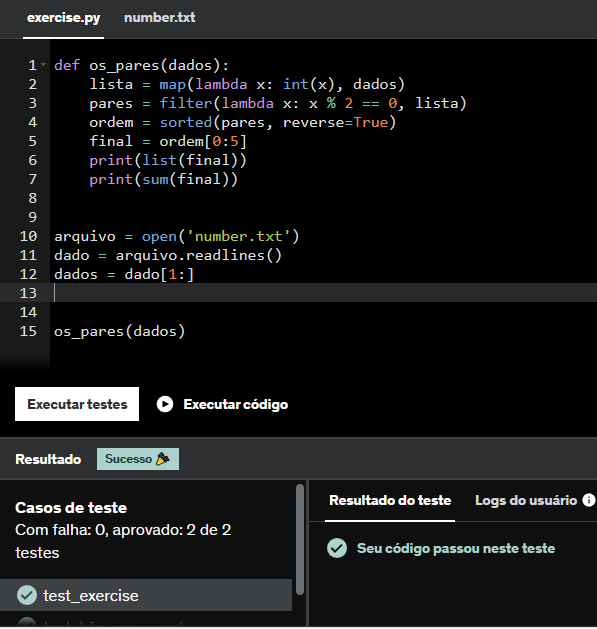

In [1]:
def os_pares(dados):
    lista = map(lambda x: int(x), dados)
    pares = filter(lambda x: x % 2 == 0, lista)
    ordem = sorted(pares, reverse=True)
    final = ordem[0:5]
    print(list(final))
    print(sum(final))


arquivo = open('number.txt')
dado = arquivo.readlines()
dados = dado[1:]


os_pares(dados)

[7914, 7744, 7534, 7306, 7302]
37800


# Exercício 2

Utilizando high order functions, implemente o corpo da função conta_vogais. O parâmetro de entrada será uma string e o resultado deverá ser a contagem de vogais presentes em seu conteúdo.

É obrigatório aplicar as seguintes funções:

len
filter
lambda

Desconsidere os caracteres acentuados. Eles não serão utilizados nos testes do seu código.

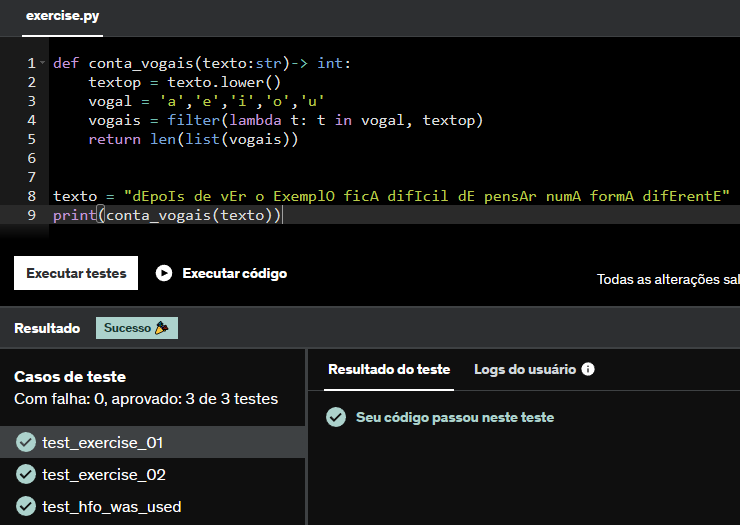

In [2]:
def conta_vogais(texto:str)-> int:
    textop = texto.lower()
    vogal = 'a','e','i','o','u'
    vogais = filter(lambda t: t in vogal, textop)
    return len(list(vogais))


texto = "dEpoIs de vEr o ExemplO ficA difIcil dE pensAr numA formA difErentE"
print(conta_vogais(texto))

25


# Exercício 3

A função calcula_saldo recebe uma lista de tuplas, correspondendo a um conjunto de lançamentos bancários. Cada lançamento é composto pelo seu valor (sempre positivo) e pelo seu tipo (C - crédito ou D - débito). 

Abaixo apresentando uma possível entrada para a função.

lancamentos = [
    (200,'D'),
    (300,'C'),
    (100,'C')
]

A partir dos lançamentos, a função deve calcular o valor final, somando créditos e subtraindo débitos. Na lista anterior, por exemplo, teríamos como resultado final 200.

Além de utilizar lambdas, você deverá aplicar, obrigatoriamente, as seguintes funções na resolução:

reduce (módulo functools)
map

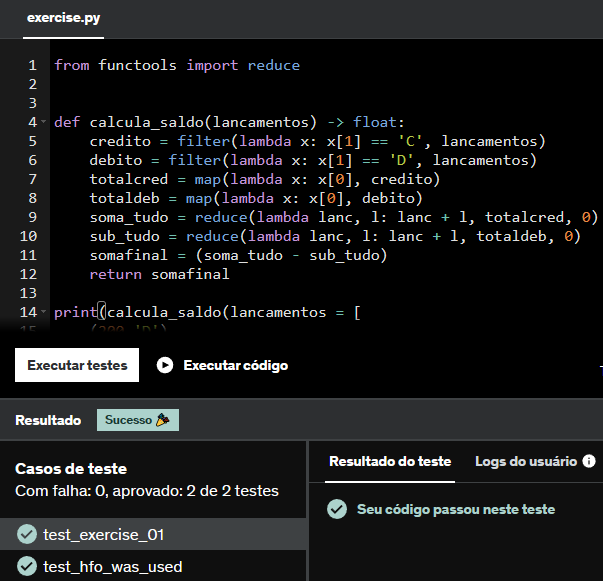

In [3]:
from functools import reduce


def calcula_saldo(lancamentos) -> float:
    credito = filter(lambda x: x[1] == 'C', lancamentos)
    debito = filter(lambda x: x[1] == 'D', lancamentos)
    totalcred = map(lambda x: x[0], credito)
    totaldeb = map(lambda x: x[0], debito)
    soma_tudo = reduce(lambda lanc, l: lanc + l, totalcred, 0)
    sub_tudo = reduce(lambda lanc, l: lanc + l, totaldeb, 0)
    somafinal = (soma_tudo - sub_tudo)
    return somafinal

print(calcula_saldo(lancamentos = [
    (200,'D'),
    (300,'C'),
    (100,'C')
]))

200


# Exercício 4

A função calcular_valor_maximo deve receber dois parâmetros, chamados de operadores e operandos. Em operadores, espera-se uma lista de caracteres que representam as operações matemáticas suportadas (+, -, /, *, %), as quais devem ser aplicadas à lista de operadores nas respectivas posições. Após aplicar cada operação ao respectivo par de operandos, a função deverá retornar o maior valor dentre eles.

Veja o exemplo:

Entrada
operadores = ['+','-','*','/','+']
operandos  = [(3,6), (-7,4.9), (8,-8), (10,2), (8,4)]

Aplicar as operações aos pares de operandos
[ 3+6 , -7-4.9, 8*-8 , 10/2 , 8+4 ] 

Obter o maior dos valores
12

Na resolução da atividade você deverá aplicar as seguintes funções:
max
zip
map

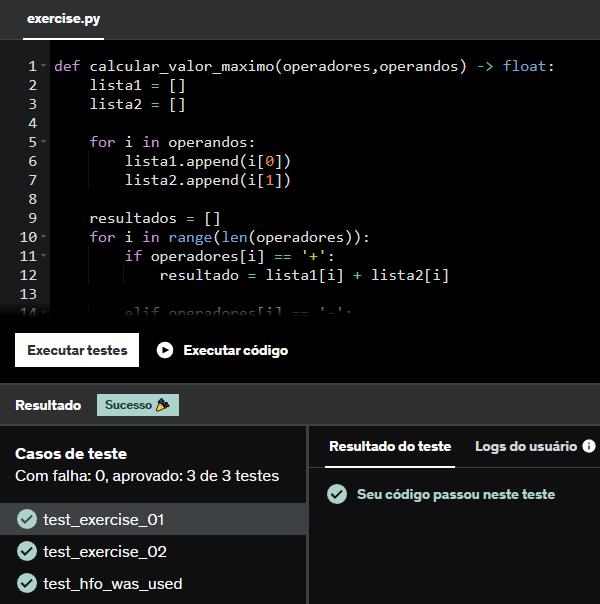

In [4]:
def calcular_valor_maximo(operadores,operandos) -> float:
    lista1 = [] 
    lista2 = []

    for i in operandos:
        lista1.append(i[0])
        lista2.append(i[1])

    resultados = []
    for i in range(len(operadores)):
        if operadores[i] == '+':
            resultado = lista1[i] + lista2[i]

        elif operadores[i] == '-':
            resultado = lista1[i] - lista2[i]

        elif operadores[i] == '*':
            resultado = lista1[i] * lista2[i]

        elif operadores[i] == '/':
            resultado = lista1[i] / lista2[i]
    
        resultados.append(resultado)
    return (max(resultados))

    
operadores = ['+','-','*','/','+']
operandos  = [(3,6), (-7,4.9), (8,-8), (10,2), (8,4)]

zipados = zip(operadores,operandos)

op = list(map(lambda x: x, operadores))
opr = list(map(lambda x: x, operandos))

final = calcular_valor_maximo(op, opr)
print(final)

12


# Exercício 5

Um determinado sistema escolar exporta a grade de notas dos estudantes em formato CSV. Cada linha do arquivo corresponde ao nome do estudante, acompanhado de 5 notas de avaliação, no intervalo [0-10]. É o arquivo estudantes.csv de seu exercício.

Precisamos processar seu conteúdo, de modo a gerar como saída um relatório em formato textual contendo as seguintes informações:

Nome do estudante
Três maiores notas, em ordem decrescente
Média das três maiores notas, com duas casas decimais de precisão

O resultado do processamento deve ser escrito na saída padrão (print), ordenado pelo nome do estudante e obedecendo ao formato descrito a seguir:

Nome: <nome estudante> Notas: [n1, n2, n3] Média: <média>

Exemplo:
Nome: Maria Luiza Correia Notas: [7, 5, 5] Média: 5.67
Nome: Maria Mendes Notas: [7, 3, 3] Média: 4.33

Em seu desenvolvimento você deverá utilizar lambdas e as seguintes funções:
round
map
sorted

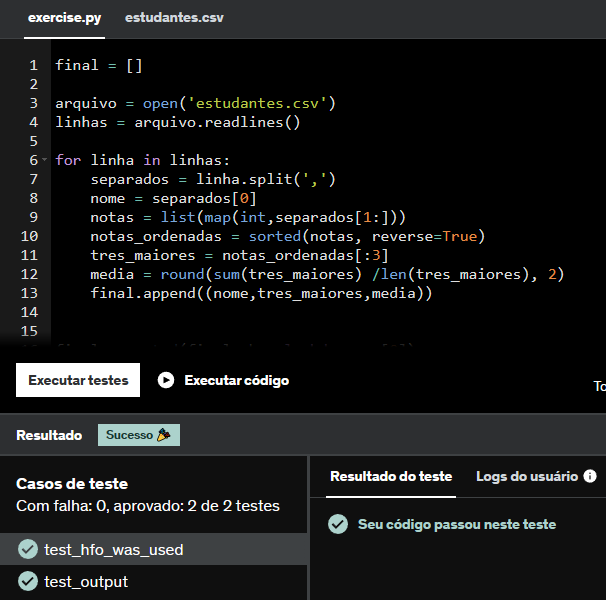

In [5]:
final = []

arquivo = open('estudantes.csv')
linhas = arquivo.readlines()

for linha in linhas:
    separados = linha.split(',')
    nome = separados[0]
    notas = list(map(int,separados[1:]))
    notas_ordenadas = sorted(notas, reverse=True)
    tres_maiores = notas_ordenadas[:3]
    media = round(sum(tres_maiores) /len(tres_maiores), 2)
    final.append((nome,tres_maiores,media))


final = sorted(final, key=lambda x: x[0])

for nome, notas, media in final:
    print(f'Nome: {nome} Notas: {notas} Média: {media}')

Nome: Alexandre da Rosa Notas: [10, 10, 8] Média: 9.33
Nome: Ana Clara das Neves Notas: [7, 6, 6] Média: 6.33
Nome: Ana GonÃ§alves Notas: [8, 3, 3] Média: 4.67
Nome: Ana Julia Cavalcanti Notas: [10, 10, 9] Média: 9.67
Nome: Ana VitÃ³ria Moraes Notas: [10, 6, 5] Média: 7.0
Nome: AndrÃ© Mendes Notas: [6, 4, 4] Média: 4.67
Nome: Beatriz Moreira Notas: [6, 4, 3] Média: 4.33
Nome: Carolina da Mata Notas: [5, 5, 3] Média: 4.33
Nome: Catarina Barros Notas: [10, 4, 3] Média: 5.67
Nome: CauÃª FogaÃ§a Notas: [10, 5, 5] Média: 6.67
Nome: CecÃ­lia Costa Notas: [9, 4, 4] Média: 5.67
Nome: Clara da Rocha Notas: [9, 9, 7] Média: 8.33
Nome: Davi Lucas Gomes Notas: [9, 8, 8] Média: 8.33
Nome: Diogo AragÃ£o Notas: [7, 5, 5] Média: 5.67
Nome: Dr. Pedro Henrique Rezende Notas: [10, 10, 3] Média: 7.67
Nome: Dra. HeloÃ­sa Pinto Notas: [8, 6, 5] Média: 6.33
Nome: Dra. Laura Pereira Notas: [6, 5, 3] Média: 4.67
Nome: Enzo Melo Notas: [10, 10, 6] Média: 8.67
Nome: Gabriel Novaes Notas: [10, 10, 8] Média: 9.33
